### Analysis

   - The target column has two different labels(0/1) so it is a binary classification problem.
   - Distribution of target varible values is very skewed. It can be visualized using histogram.
   - The training set is very **imbalanced** , 0  being major class and 1 being minor class.
   - Since training data is imbalanced **Accuracy can not be** good evaluation metric. 
   - This line **output = 0 will give almost 96% accuracy.**


#### Metric
   
   -  Since $F_1$ score is hormonic mean of precision and recall it will be better evaluation metric.
   
   -  $F_1 = \frac{2*precesion*recall}{(precesion+recall)}$
   
### Modeling Imbalanced Data

   -  Since number of minor class samples are very less, it is very difficult for models to detect.
   -  Solutions for this  can be collecting more minority class samples or balancing the two classes using following         methods
       * Under sampling major class
           - This might cause information loss.
       * over sampling minor class
           - This might cause models to overfit to same minor class samples.
   - These two techniques form a tradoff
   - This solution used combination of under sampling and a method that generates new minor class points from existence samples.
   
### Feature Engineering

   - Even though there is no good statistical evidence that shows relation between derived fields and num columns
    in this solution i assumed it removed them from training data.
   - This can be experimented more once the relation between there columns is determined.
    
### Model selection 

   - Started with Logistic regression, Decision Trees both could not give satisfactory results when tested with cross validation
   - Experimented with ensemble methods, especially RandomForest which performed well on boht cross validation as well as on validation set.
    
### Results 

   - confusion matrics 
                [9697  303]
                [852  9148]
   - **Precision** 96%
   - **recall** 91%
   - **f1_score** 0.94
   - **acuuracy** 94%
    

In [1]:
import pandas as pd


In [2]:
def read_data(loc):
    
    data = pd.read_csv(loc)
    return data
    
    

In [3]:
# Delete all columns with name num* and id.

def clean_data(data):
    

    delete_cols = [c for c in raw_data.columns if 'num' in c ]
    delete_cols += ['id']
    data = data.drop(columns = delete_cols)
    return data

In [4]:
# This function stores the correlation matrix corr.csv file
def get_coor(data,file_name = 'corr.csv'):
    
    corr = data.corr()
    corr.to_csv(file_name)

In [5]:

train_file = 'data_train.csv'
raw_data = read_data(train_file)

In [6]:
# properties of data

# row, col = data.shape
# get_coor(raw_data)
# description = data.describe()
# description.to_csv('description.csv')
# train = data.sample(n=int(row*0.3))
train_data = clean_data(raw_data)
label = train_data.target


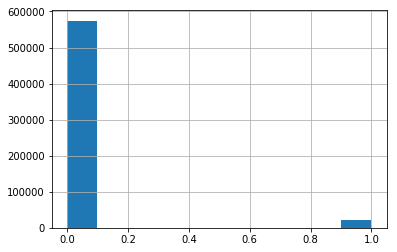

In [7]:
%matplotlib inline

label.hist()

In [8]:
train_data = train_data.drop(columns=['target'])

In [9]:
# Filling all columns that have missing values.

def fill_na_mode(data):
    
    cols = data.isna().any()
    na_col = [col for col in cols.keys() if cols[col] == True]
    na_val= {
    
    col : data[col].mode()[0]
    for col in na_col
    }
    
    print na_val
    data = data.fillna(na_val)
    
    return data,na_val
    

In [10]:
train_data,na_val = fill_na_mode(train_data)

{'cat12': 2.0, 'cat10': 1.0, 'cat1': 1.0, 'cat2': 0.0, 'cat3': 0.0, 'cat4': 11.0, 'cat5': 1.0, 'cat6': 1.0, 'cat8': 1.0}


In [11]:
# Undersampling followed by SMOTE to reduce majority class effect and increase the minority class samples.

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import  SMOTEENN
train_data, label = RandomUnderSampler(ratio={0:250000,1:21716}).fit_resample(train_data,label)

train_data, label= SMOTE().fit_resample(train_data, label)
# train_data, label= SMOTEENN().fit_resample(train_data, label)

train_data = pd.DataFrame(train_data)
label = pd.Series(label)


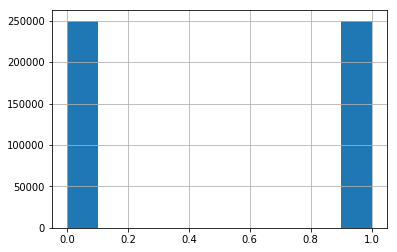

In [12]:
pd.Series(label).hist()

In [13]:
# train_data.isna().any()
# train_data = train_data.drop(columns=['target'])
train_data.shape
train_data.tail()


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
499995,0.280487,0.154878,0.667683,2.225609,2.000000,7.225609,4.000000,9.451218,1.225609,5.225609,...,1.000000,0.000000,0.0,0.774391,0.774391,1.000000,1.000000,1.774391,1.0,65.225609
499996,0.292461,0.535009,0.770017,1.675043,0.675043,8.000000,5.000000,8.675043,2.675043,5.324957,...,1.000000,1.000000,0.0,0.675043,0.000000,0.675043,0.324957,1.350086,1.0,87.000000
499997,0.487176,0.602565,0.784611,2.025648,2.974352,8.974352,5.000000,9.974352,3.000000,8.974352,...,0.974352,1.000000,0.0,0.025648,10.000000,0.974352,1.000000,0.051296,1.0,89.000000
499998,0.205370,0.735123,0.275617,2.000000,0.648765,8.351235,4.648765,8.351235,3.351235,9.946296,...,0.000000,0.648765,9.0,1.000000,0.000000,0.351235,1.000000,3.297531,1.0,104.000000
499999,0.709515,0.300000,0.471455,2.190299,3.000000,7.000000,3.095149,10.904851,3.000000,7.190299,...,1.000000,1.000000,0.0,1.000000,0.095149,1.000000,1.000000,1.809701,1.0,104.000000


In [14]:
# StratifiedKFold split is used to get train/validation split

from sklearn.model_selection import ShuffleSplit,StratifiedKFold

s_kfold = StratifiedKFold(n_splits=25,shuffle=True)

# s_kfold.split(train_data,label)

for train_index, test_index in s_kfold.split(train_data,label):
    
    X_train, X_val = train_data.iloc[train_index], train_data.iloc[test_index]
    Y_train, Y_val = label.iloc[train_index], label.iloc[test_index]
    break

    
print 'Trian shape',X_train.shape
print 'Test shape',X_val.shape

Trian shape (480000, 33)
Test shape (20000, 33)


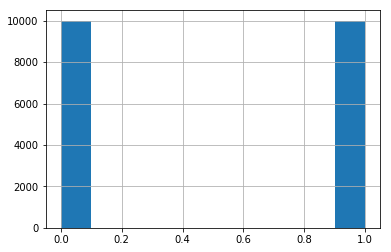

In [15]:
Y_val.hist()

In [16]:
from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model = LogisticRegression()
# model = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=3)


In [17]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

['precision_samples',
 'f1_weighted',
 'balanced_accuracy',
 'f1_samples',
 'f1',
 'adjusted_mutual_info_score',
 'precision',
 'normalized_mutual_info_score',
 'neg_mean_squared_error',
 'precision_micro',
 'neg_mean_squared_log_error',
 'recall_samples',
 'homogeneity_score',
 'precision_weighted',
 'fowlkes_mallows_score',
 'average_precision',
 'roc_auc',
 'adjusted_rand_score',
 'recall_macro',
 'v_measure_score',
 'completeness_score',
 'r2',
 'recall_weighted',
 'recall',
 'precision_macro',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'mutual_info_score',
 'f1_macro',
 'f1_micro',
 'brier_score_loss',
 'recall_micro',
 'neg_median_absolute_error',
 'explained_variance',
 'accuracy']

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
st = StratifiedKFold(n_splits=15,shuffle=True)
scores = cross_val_score(model,X_train,Y_train,cv=st,scoring='recall')
print scores

[0.917125  0.9148125 0.91325   0.9159375 0.9171875 0.9144375 0.9165625
 0.9186875 0.912875  0.9155    0.914625  0.91375   0.914375  0.9148125
 0.9133125]


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_recall_curve,precision_score,recall_score
def metrics(actual, predicted):
    
    print ' confusion matrics \n',confusion_matrix(actual, predicted)
    print ' precision \n ', precision_score(y_pred=predicted, y_true=actual)
    print ' recall \n',recall_score(y_pred=predicted, y_true=actual)
    print ' f1_score \n',f1_score(y_pred=predicted, y_true=actual)
    print 'acuuracy \n ',accuracy_score(y_pred=predicted, y_true=actual)

In [21]:
result = model.predict(X_train)

In [22]:
metrics(Y_train,result)

 confusion matrics 
[[238937   1063]
 [  5232 234768]]
 precision 
  0.9954925349084726
 recall 
0.9782
 f1_score 
0.9867705130603092
acuuracy 
  0.9868854166666666


In [23]:
result = model.predict(X_val)
metrics(Y_val, result)

 confusion matrics 
[[9697  303]
 [ 852 9148]]
 precision 
  0.9679399005396254
 recall 
0.9148
 f1_score 
0.9406200195362705
acuuracy 
  0.94225


In [24]:
test_data = read_data('data_test.csv')
test_data.head()

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
0,0,0,8,0,1,0,0,0,0,0,...,1.0,NaN,0,NaN,1,1.0,1,2.0,1,65
1,1,4,5,0,0,0,1,0,0,0,...,1.0,NaN,0,0.0,11,1.0,1,0.0,1,103
2,2,5,3,0,0,0,1,0,0,0,...,1.0,NaN,0,NaN,14,1.0,1,2.0,1,29
3,3,0,6,1,0,0,0,0,0,0,...,1.0,NaN,0,NaN,1,1.0,1,2.0,1,40
4,4,5,7,0,0,0,1,0,0,0,...,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101


In [25]:
ids = test_data.id
test_data = clean_data(test_data)
test_data.head()

,der1,der2,der3,der4,der5,der6,der7,der8,der9,der10,...,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
0,0.1,0.8,0.6,1,1,6,3,6,2,9,...,1.0,NaN,0,NaN,1,1.0,1,2.0,1,65
1,0.4,0.5,0.4,3,3,8,4,10,2,7,...,1.0,NaN,0,0.0,11,1.0,1,0.0,1,103
2,0.6,0.6,0.6,2,3,7,4,6,3,12,...,1.0,NaN,0,NaN,14,1.0,1,2.0,1,29
3,0.1,0.5,0.5,2,1,7,3,12,1,13,...,1.0,NaN,0,NaN,1,1.0,1,2.0,1,40
4,0.9,0.6,0.8,3,4,7,1,10,4,12,...,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101


In [26]:
test_data = test_data.fillna(na_val)
result = model.predict(test_data)

In [27]:
result_frame = {'id':ids,
               'target':result
               }
result_frame = pd.DataFrame(result_frame)

In [28]:
result_frame.to_csv('result.csv')

In [29]:
# import pickle
# filename = 'model.sav'
# pickle.dump(model, open(filename, 'wb'))